## Linear Regression (aka ordinary least squares [OLS])

In [3]:
# Linear model for regression

import mglearn
mglearn.plots.plot_linear_regression_wave()

w[0]: 0.393906  b: -0.031804


In [5]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [8]:
# Measuring score

print("Train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Train set score: 0.67
Test set score: 0.66


In [10]:
# With higher dimensional dataset - a large number of features

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# buliding model
lr = LinearRegression().fit(X_train, y_train)

In [11]:
# Measuring score

print("Train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Train set score: 0.95
Test set score: 0.61



## RIDGE Regression


In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Train set score: 0.89
Test set score: 0.75


In [16]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Train set score: 0.79
Test set score: 0.64


In [17]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Train set score: 0.93
Test set score: 0.77


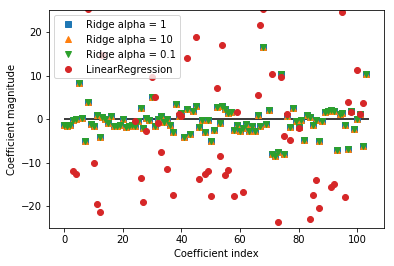

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

ridge = Ridge().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [17]:
import mglearn
mglearn.plots.plot_ridge_n_samples()

## Lasso (a alternative to Ridge for regularizing linear regression)

In [12]:
!pip install mglearn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
import mglearn
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of feature used: 4


In [18]:
# to reduce underfitting, lets decrease alpha and increase max_iter

lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of feature used: 33


In [19]:
# a lower alpha allowed us to fit a more complex model

lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of feature used: 94
